In [2]:
import sympy as sp
import pandas as pd
import gurobipy as gp
from gurobipy import Model, GRB, quicksum
import numpy as np

In [2]:
# Load the dataset
price_df = pd.read_csv("https://raw.githubusercontent.com/selvinfurtado01/operational_reserach/refs/heads/main/price_response.csv")

In [27]:
# Display basic information about the dataset
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     34 non-null     int64  
 1   Product                  34 non-null     object 
 2   Intercept                34 non-null     float64
 3   Own_Price_Coefficient    34 non-null     float64
 4   Cross_Price_Coefficient  34 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [28]:
price_df.head()

,Week,Product,Intercept,Own_Price_Coefficient,Cross_Price_Coefficient
0,1,TechFit Smartwatch,294.306794,-1.491429,0.281513
1,1,PowerSound Earbuds,274.787669,-1.589617,0.251110
2,2,TechFit Smartwatch,268.639450,-1.923020,0.157950
3,2,PowerSound Earbuds,248.366386,-1.070302,0.261624
4,3,TechFit Smartwatch,390.021127,-1.128539,0.260734


# Question 1

## Part A: Optimal Prices for Week 1 and Week 2 for TechSmart Watch

In [29]:
# Create a Gurobi model
model = Model("Optimal Pricing")

# Define decision variables (prices for Week 1 and Week 2)
P1 = model.addVar(name="P1", vtype=GRB.CONTINUOUS, lb=0)  # Price for Week 1 (non-negative)
P2 = model.addVar(name="P2", vtype=GRB.CONTINUOUS, lb=0)  # Price for Week 2 (non-negative)

# Define demand functions based on Table 2
Q1 = 1000 - 5 * P1  # Demand function for Week 1
Q2 = 950 - 4.5 * P2  # Demand function for Week 2

# Define revenue functions
R1 = P1 * Q1  # Revenue for Week 1
R2 = P2 * Q2  # Revenue for Week 2

# Set the objective function to maximize total revenue
model.setObjective(R1 + R2, GRB.MAXIMIZE)

# Optimize the model"
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal Price for Week 1: {P1.x:.2f}")
    print(f"Optimal Price for Week 2: {P2.x:.2f}")
else:
    print("Optimal solution not found.")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x01fefae1
Model has 2 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+03, 1e+03]
  QObjective range [9e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.04s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.05 seconds (0.00 work units)
Optimal objective 1.00138889e+05
Optimal Price for Week 1: 100.00
Optimal Price for Week 2: 105.56


## Part B: Optimal Prices for Week 1 and Week 2 for TechSmart Watch (Remain the same both weeks)

In [30]:
# Create a Gurobi model
model = Model("Optimal Uniform Pricing")

# Define decision variable (single price for both weeks)
P = model.addVar(name="P", vtype=GRB.CONTINUOUS, lb=0)  # Price (non-negative)

# Define demand functions based on Table 2
Q1 = 1000 - 5 * P  # Demand function for Week 1
Q2 = 950 - 4.5 * P  # Demand function for Week 2

# Define total revenue function
R_total = P * Q1 + P * Q2  # Combined revenue for both weeks

# Set the objective function to maximize total revenue
model.setObjective(R_total, GRB.MAXIMIZE)

# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print(f"Optimal Uniform Price for Both Weeks: {P.x:.2f}")
else:
    print("Optimal solution not found.")


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 0 rows, 1 columns and 0 nonzeros
Model fingerprint: 0x36313fc2
Model has 1 quadratic objective term
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+03, 2e+03]
  QObjective range [2e+01, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.03s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective 1.00065789e+05
Optimal Uniform Price for Both Weeks: 102.63


## Part D: Optimal Prices For Both Products

In [31]:
# Coefficients of Week 1 and Week 2
weeks_to_consider = [1, 2]
data = price_df[price_df['Week'].isin(weeks_to_consider)]

In [32]:
# Extract demand function parameters
smartwatch_params = data[data['Product'] == 'TechFit Smartwatch'].iloc[:, 2:].values
earbuds_params = data[data['Product'] == 'PowerSound Earbuds'].iloc[:, 2:].values

intercepts = np.array([smartwatch_params[:, 0], earbuds_params[:, 0]])
own_price_coeffs = np.array([smartwatch_params[:, 1], earbuds_params[:, 1]])
cross_price_coeffs = np.array([smartwatch_params[:, 2], earbuds_params[:, 2]])

In [33]:
# Initialize parameters
alpha = 0.001  
tolerance = 1e-6  
max_iterations = 10000  

In [34]:
# Initialize prices at zero
prices = np.array([0.0, 0.0])

In [35]:
# Create Gurobi model
model = Model("Projected Gradient Descent")

In [36]:
# Define Gurobi variables for prices
p1 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="price_smartwatch")
p2 = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="price_earbuds")
model.update()

In [37]:
# Projected Gradient Descent Algorithm
for _ in range(max_iterations):
    # Compute gradients
    demands = intercepts + own_price_coeffs * prices[:, None] + cross_price_coeffs * prices[::-1, None]
    revenue = (prices[:, None] * demands).sum(axis=1)
    gradients = demands.sum(axis=1) + prices * own_price_coeffs.sum(axis=1)
    
    # Update prices
    new_prices = prices + alpha * gradients
    
    # Projection step (ensure non-negative prices)
    new_prices = np.maximum(new_prices, 0)
    
    # Check stopping criterion
    if np.linalg.norm(new_prices - prices) < tolerance:
        break
    
    prices = new_prices

In [38]:
# Set optimized prices in Gurobi model
model.addConstr(p1 == prices[0])
model.addConstr(p2 == prices[1])

<gurobi.Constr *Awaiting Model Update*>

In [39]:
# Optimize model
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 2 rows, 2 columns and 2 nonzeros
Model fingerprint: 0xc20f3082
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e+01, 1e+02]
Presolve removed 2 rows and 2 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.05 seconds (0.00 work units)
Optimal objective  0.000000000e+00


In [40]:
# Optimal Prices
print(f"Optimal Prices: TechFit Smartwatch: {p1.X}")
print(f"Optimal Prices: PowerSound Earbuds: {p2.X}")

Optimal Prices: TechFit Smartwatch: 89.31835768405954
Optimal Prices: PowerSound Earbuds: 106.94866767116753


## PART F: Solving the Model for all Constraints and Dynamic Pricing

In [3]:
# Extract relevant coefficients
products = ['TechFit Smartwatch', 'PowerSound Earbuds']

# For the 17 weeks (1-18)
weeks = list(range(1, 18))
data = price_df[price_df['Week'].isin(weeks)]

In [4]:
# Initialize Gurobi model
model = Model("Dynamic Pricing Optimization")

Set parameter Username
Set parameter LicenseID to value 2610029
Academic license - for non-commercial use only - expires 2026-01-14


In [5]:
# Decision variables: Prices for each product and week
prices = model.addVars(weeks, products, lb=0, vtype=GRB.CONTINUOUS, name="price")
total_revenue = 0

In [6]:
# Auxiliary variables for min and max prices
min_price = model.addVars(products, vtype=GRB.CONTINUOUS, name="min_price")
max_price = model.addVars(products, vtype=GRB.CONTINUOUS, name="max_price")

In [7]:
# Constraints to define min and max prices
for product in products:
    for week in weeks:
        model.addConstr(min_price[product] <= prices[week, product])
        model.addConstr(max_price[product] >= prices[week, product])

In [8]:
# Define objective function (maximize revenue)
total_revenue = quicksum(
    (row["Intercept"] + row["Own_Price_Coefficient"] * prices[week, product] +
     row["Cross_Price_Coefficient"] * prices[week, 'PowerSound Earbuds' if product == 'TechFit Smartwatch' else 'TechFit Smartwatch']) 
    * prices[week, product]
    for week in weeks for product in products
    for _, row in price_df[(price_df['Week'] == week) & (price_df['Product'] == product)].iterrows()
)

model.setObjective(total_revenue, GRB.MAXIMIZE)

In [9]:
# Price constraints by week
for week in weeks:
    if 1 <= week <= 4:
        model.addConstrs(prices[w, p] == prices[1,p] for p in products for w in range(1,5))
    elif 5 <= week <= 8:
        model.addConstrs(prices[w, p] == prices[5,p] for p in products for w in range(5,9))
        model.addConstrs(prices[5, p] <= prices[1,p] - 10 for p in products for w in range(5,9))
    elif 9 <= week <= 11:
        model.addConstrs(prices[w, p] == prices[9,p] for p in products for w in range(9,12))
        model.addConstrs(prices[9, p] >= prices[1,p] + 20 for p in products for w in range(9,12))
    elif week == 12:
        model.addConstrs(prices[12, p] <= prices[w, p] - 5 for p in products for w in weeks if w not in [12, 16])
    elif 13 <= week <= 15:
        model.addConstrs(prices[w, p] == prices[13,p] for p in products for w in range(13,16))
        model.addConstrs(prices[13, p] >= prices[5,p] + 10 for p in products for w in range(13,16))
        model.addConstrs(prices[13, p] <= prices[1,p] for p in products for w in range(13,16))
    elif week == 16:
        model.addConstrs(prices[16, p] >= prices[12, p] + 4 for p in products)
        model.addConstrs(prices[16, p] <= prices[w, p] - 6 for p in products for w in weeks if w not in [12, 16])
    elif week == 17:
        model.addConstrs(prices[17, p] >= prices[w,p] + 15 for p in products for w in weeks if w not in [17])

In [10]:
# Optimize model
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 348 rows, 38 columns and 640 nonzeros
Model fingerprint: 0xb0584d10
Model has 51 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 5e+02]
  QObjective range [5e-01, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 2e+01]
Presolve removed 230 rows and 4 columns
Presolve time: 0.02s
Presolved: 118 rows, 34 columns, 236 nonzeros
Presolved model has 51 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 17
 AA' NZ     : 1.276e+03
 Factor NZ  : 4.841e+03
 Factor Ops : 2.103e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Tim

In [11]:
# Retrieve optimal revenue
if model.status == GRB.OPTIMAL:
    optimal_revenue = model.objVal
    print(f"Optimal Revenue over 17-week period: {optimal_revenue}\n")
    
    optimal_prices = {
        week: {product: round(prices[week, product].x, 2) for product in products} 
        for week in weeks
    }
    
    print("Optimal Prices by Week:\n")
    for week, price_data in optimal_prices.items():
        print(f"Week {week}:")
        for product, price in price_data.items():
            print(f"  {product}: ${price}")
else:
    print("Model did not find an optimal solution.")

Optimal Revenue over 17-week period: 772341.3991526925

Optimal Prices by Week:

Week 1:
  TechFit Smartwatch: $139.77
  PowerSound Earbuds: $122.21
Week 2:
  TechFit Smartwatch: $139.77
  PowerSound Earbuds: $122.21
Week 3:
  TechFit Smartwatch: $139.77
  PowerSound Earbuds: $122.21
Week 4:
  TechFit Smartwatch: $139.77
  PowerSound Earbuds: $122.21
Week 5:
  TechFit Smartwatch: $129.71
  PowerSound Earbuds: $112.21
Week 6:
  TechFit Smartwatch: $129.71
  PowerSound Earbuds: $112.21
Week 7:
  TechFit Smartwatch: $129.71
  PowerSound Earbuds: $112.21
Week 8:
  TechFit Smartwatch: $129.71
  PowerSound Earbuds: $112.21
Week 9:
  TechFit Smartwatch: $159.77
  PowerSound Earbuds: $142.21
Week 10:
  TechFit Smartwatch: $159.77
  PowerSound Earbuds: $142.21
Week 11:
  TechFit Smartwatch: $159.77
  PowerSound Earbuds: $142.21
Week 12:
  TechFit Smartwatch: $86.1
  PowerSound Earbuds: $79.9
Week 13:
  TechFit Smartwatch: $139.71
  PowerSound Earbuds: $122.21
Week 14:
  TechFit Smartwatch: $139

## PART G: Product Price Graph

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Extract weeks and corresponding optimal prices
weeks = list(range(1, 18))  # Weeks 1 to 17
techfit_prices = [optimal_prices[w]["TechFit Smartwatch"] for w in weeks]
earbuds_prices = [optimal_prices[w]["PowerSound Earbuds"] for w in weeks]

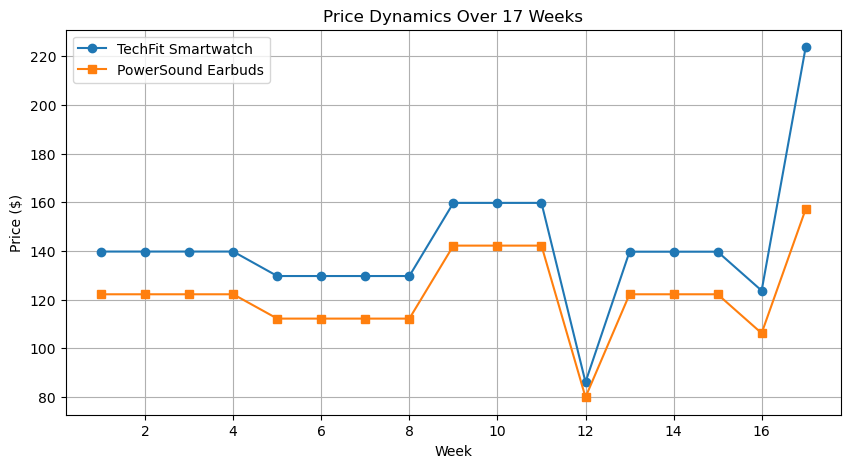

In [14]:
# Plot price dynamics over 17 weeks
plt.figure(figsize=(10, 5))
plt.plot(weeks, techfit_prices, label="TechFit Smartwatch", marker="o", linestyle="-")
plt.plot(weeks, earbuds_prices, label="PowerSound Earbuds", marker="s", linestyle="-")

# Formatting
plt.xlabel("Week")
plt.ylabel("Price ($)")
plt.title("Price Dynamics Over 17 Weeks")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## PART H)

In [53]:
import pandas as pd
from scipy.optimize import minimize_scalar

# Load the price response dataset
file_path = "https://raw.githubusercontent.com/selvinfurtado01/operational_reserach/refs/heads/main/price_response.csv" 
price_data = pd.read_csv(file_path)

In [54]:
# Function to calculate total revenue for a given single price across all weeks
def total_revenue_single_price(P, data):
    revenue = 0
    for week in data["Week"].unique():
        week_data = data[data["Week"] == week]
        
        for _, row in week_data.iterrows():
            demand = row["Intercept"] + (row["Own_Price_Coefficient"] * P) + (row["Cross_Price_Coefficient"] * P)
            demand = max(demand, 0)  # Ensure non-negative demand
            revenue += demand * P  # Revenue = Price * Demand
            
    return -revenue  # Minimize negative revenue (to maximize revenue)

# **Optimize for the best single constrained price**
result = minimize_scalar(total_revenue_single_price, bounds=(0, max(price_data["Intercept"])), args=(price_data,), method='bounded')
optimal_constrained_price = result.x
optimal_constrained_revenue = -result.fun  # Convert back from negative revenue

In [55]:
# **Calculate Unconstrained Dynamic Pricing Revenue**
def calculate_revenue_unconstrained(data):
    revenue = 0
    avg_price = data["Intercept"].mean()
    
    for week in data["Week"].unique():
        week_data = data[data["Week"] == week]
        
        for _, row in week_data.iterrows():
            if row["Own_Price_Coefficient"] != 0:
                price = (row["Intercept"] + row["Cross_Price_Coefficient"] * avg_price) / (-2 * row["Own_Price_Coefficient"])
            else:
                price = row["Intercept"]  # Fallback in case of zero coefficient

            price = max(price, 0)
            demand = row["Intercept"] + (row["Own_Price_Coefficient"] * price) + (row["Cross_Price_Coefficient"] * avg_price)
            demand = max(demand, 0)
            revenue += demand * price

    return revenue

# Compute optimal revenue for Unconstrained Dynamic Pricing
optimal_unconstrained_revenue = calculate_revenue_unconstrained(price_data)

In [56]:
# Create a DataFrame to compare revenues
dynamic_pricing_comparison = pd.DataFrame({
    "Pricing Strategy": ["Unconstrained Dynamic Pricing", "Optimized Constrained Dynamic Pricing"],
    "Total Optimal Revenue": [optimal_unconstrained_revenue, optimal_constrained_revenue]
})

# Format numbers to two decimal places
dynamic_pricing_comparison["Total Optimal Revenue"] = dynamic_pricing_comparison["Total Optimal Revenue"].apply(lambda x: "{:,.2f}".format(x))


# Print the updated revenue comparison
print(dynamic_pricing_comparison)
print(f"Optimal Single Price for Constrained Dynamic Pricing: {optimal_constrained_price:.2f}")

                        Pricing Strategy Total Optimal Revenue
0          Unconstrained Dynamic Pricing          1,036,229.92
1  Optimized Constrained Dynamic Pricing            757,612.52
Optimal Single Price for Constrained Dynamic Pricing: 131.57


# QUESTION 2


## PART A)

In [57]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd

# Load hotel dataset
hotel_data = pd.read_csv("https://raw.githubusercontent.com/selvinfurtado01/operational_reserach/refs/heads/main/hotels.csv")

In [58]:
# Parameters
num_attendants = 8  # Given in the question
max_overtime_hours = 2  # Maximum overtime allowed
base_hours = 8  # Regular work hours
hourly_wage = 25  # Hourly wage for attendants
overtime_multiplier = 1.5  # Overtime pay factor

# Create Gurobi model
model_a = gp.Model("Hotel_Overtime_Tracking")

# Decision Variables
x = model_a.addVars(num_attendants, len(hotel_data), vtype=GRB.BINARY, name="Assign")
# x[i, r] = 1 if attendant i cleans room r

overtime = model_a.addVars(num_attendants, vtype=GRB.BINARY, name="Overtime")
# overtime[i] = 1 if attendant i exceeds regular work hours

In [59]:
# Constraints

# (1) Each room must be assigned to exactly one attendant
for r in range(len(hotel_data)):
    model_a.addConstr(gp.quicksum(x[i, r] for i in range(num_attendants)) == 1, f"Room_Assignment_{r}")

# (2) Work hours constraint (base hours + overtime)
for i in range(num_attendants):
    total_hours = gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data)))
    model_a.addConstr(total_hours <= base_hours + max_overtime_hours * overtime[i], f"Work_Hours_{i}")

# (3) Overtime binary variable constraint
for i in range(num_attendants):
    model_a.addConstr(overtime[i] * base_hours <= total_hours, f"Overtime_Definition_{i}")

# Objective Function: Minimize staffing cost
model_a.setObjective(
    gp.quicksum(x[i, r] * hourly_wage * base_hours for i in range(num_attendants) for r in range(len(hotel_data))) +
    gp.quicksum(overtime[i] * hourly_wage * overtime_multiplier * max_overtime_hours for i in range(num_attendants)),
    GRB.MINIMIZE
)

# Solve model
model_a.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 68 rows, 424 columns and 1264 nonzeros
Model fingerprint: 0x509c1485
Variable types: 0 continuous, 424 integer (424 binary)
Coefficient statistics:
  Matrix range     [6e-01, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 10775.000000
Presolve time: 0.01s
Presolved: 68 rows, 424 columns, 1264 nonzeros
Variable types: 0 continuous, 424 integer (424 binary)

Root relaxation: objective 1.046051e+04, 73 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 10460.5114    0   10 10775.0000 10460.5114  2.92%     -

In [60]:
# Print results
if model_a.status == GRB.OPTIMAL:
    print("Optimal Solution for Part (a) Found!\n")
    for i in range(num_attendants):
        assigned_rooms = [r for r in range(len(hotel_data)) if x[i, r].x > 0.5]
        print(f"Attendant {i+1}: Assigned Rooms {assigned_rooms}")
        print(f"Overtime: {'Yes' if overtime[i].x > 0.5 else 'No'}\n")
else:
    print("No optimal solution found for Part (a).")


Optimal Solution for Part (a) Found!

Attendant 1: Assigned Rooms [12, 18, 25, 26, 32, 34, 40, 48]
Overtime: No

Attendant 2: Assigned Rooms [2, 4, 5, 11, 28, 45, 46]
Overtime: No

Attendant 3: Assigned Rooms [3, 14, 30, 31, 36, 37, 44]
Overtime: No

Attendant 4: Assigned Rooms [1, 10, 15, 41, 49, 50]
Overtime: No

Attendant 5: Assigned Rooms [7, 9, 19, 27, 39, 42]
Overtime: No

Attendant 6: Assigned Rooms [6, 8, 21, 29, 51]
Overtime: No

Attendant 7: Assigned Rooms [17, 20, 22, 23, 38, 43]
Overtime: No

Attendant 8: Assigned Rooms [0, 13, 16, 24, 33, 35, 47]
Overtime: Yes



## PART B)

In [61]:
# Parameters
num_attendants = 8  

# Create Gurobi model
model_b = gp.Model("Hotel_Floor_Assignment")

# Decision Variables
x = model_b.addVars(num_attendants, len(hotel_data), vtype=GRB.BINARY, name="Assign")
# x[i, r] = 1 if attendant i cleans room r

f = model_b.addVars(num_attendants, hotel_data["Floor"].nunique(), vtype=GRB.BINARY, name="FloorAssignment")
# f[i, k] = 1 if attendant i is assigned to at least one room on floor k


In [62]:
# Constraints

# (1) Each room must be assigned to exactly one attendant
for r in range(len(hotel_data)):
    model_b.addConstr(gp.quicksum(x[i, r] for i in range(num_attendants)) == 1, f"Room_Assignment_{r}")

# (2) Floor assignment constraint
for i in range(num_attendants):
    for k in range(hotel_data["Floor"].nunique()):
        assigned_rooms = [r for r in range(len(hotel_data)) if hotel_data.iloc[r]["Floor"] == k + 1]
        model_b.addConstr(f[i, k] >= gp.quicksum(x[i, r] for r in assigned_rooms), f"Floor_Assignment_{i}_{k}")

# Objective Function: Minimize the number of attendants assigned to floors
model_b.setObjective(
    gp.quicksum(f[i, k] for i in range(num_attendants) for k in range(hotel_data["Floor"].nunique())),
    GRB.MINIMIZE
)

# Solve model
model_b.optimize()


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 164 rows, 528 columns and 944 nonzeros
Model fingerprint: 0x69aa0eb5
Variable types: 0 continuous, 528 integer (528 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 52.0000000
Presolve removed 148 rows and 464 columns
Presolve time: 0.04s
Presolved: 16 rows, 64 columns, 128 nonzeros
Variable types: 0 continuous, 64 integer (64 binary)

Explored 0 nodes (0 simplex iterations) in 0.08 seconds (0.01 work units)
Thread count was 4 (of 4 available processors)

Solution count 1: 52 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.200000000000e+01, best bound 5.200000000000e+01, gap 0.0000%


In [63]:
# Print results
if model_b.status == GRB.OPTIMAL:
    print("Optimal Solution for Part (b) Found!\n")
    for i in range(num_attendants):
        assigned_floors = [k + 1 for k in range(hotel_data["Floor"].nunique()) if f[i, k].x > 0.5]
        print(f"Attendant {i+1}: Assigned Floors {assigned_floors}\n")
else:
    print("No optimal solution found for Part (b).")


Optimal Solution for Part (b) Found!

Attendant 1: Assigned Floors [3, 4, 5, 6, 7, 9, 11, 12, 13, 14]

Attendant 2: Assigned Floors [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14]

Attendant 3: Assigned Floors [5, 10, 12, 13]

Attendant 4: Assigned Floors [12]

Attendant 5: Assigned Floors [1, 2, 3, 4, 5, 8, 9, 11, 12, 13]

Attendant 6: Assigned Floors [3, 5, 7, 10, 11, 12, 13, 14]

Attendant 7: Assigned Floors [5, 6, 7, 12, 13]

Attendant 8: Assigned Floors [10, 12]



## PART E: Optimal Cost for Solving the Binary Program

In [3]:
# Load hotel dataset
hotel_data = pd.read_csv("https://raw.githubusercontent.com/selvinfurtado01/operational_reserach/refs/heads/main/hotels.csv")

In [4]:
# Parameters
num_attendants = 8  
max_overtime_hours = 2  
base_hours = 8  
hourly_wage = 25  
overtime_multiplier = 1.5  
floor_violation_penalty = 75 

# Create a new Gurobi model
model_e = gp.Model("Hotel_Optimization_Part_E")

# Decision Variables
x = model_e.addVars(num_attendants, len(hotel_data), vtype=GRB.BINARY, name="Assign")  
overtime = model_e.addVars(num_attendants, vtype=GRB.BINARY, name="Overtime")  
f = model_e.addVars(num_attendants, hotel_data["Floor"].nunique(), vtype=GRB.BINARY, name="FloorAssignment")
floor_violation = model_e.addVars(num_attendants, vtype=GRB.INTEGER, name="FloorViolation")  

# Constraints

# (1) Each room must be assigned to exactly one attendant
for r in range(len(hotel_data)):
    model_e.addConstr(gp.quicksum(x[i, r] for i in range(num_attendants)) == 1, f"Room_Assignment_{r}")

# (2) Work hours constraint (base hours + overtime)
for i in range(num_attendants):
    total_hours = gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data)))
    model_e.addConstr(total_hours <= base_hours + max_overtime_hours * overtime[i], f"Work_Hours_{i}")

# (3) Overtime binary variable constraint
for i in range(num_attendants):
    model_e.addConstr(overtime[i] * base_hours <= total_hours, f"Overtime_Definition_{i}")

# (4) Floor assignment constraint
for i in range(num_attendants):
    for k in range(hotel_data["Floor"].nunique()):
        assigned_rooms = [r for r in range(len(hotel_data)) if hotel_data.iloc[r]["Floor"] == k + 1]
        model_e.addConstr(f[i, k] >= gp.quicksum(x[i, r] for r in assigned_rooms), f"Floor_Assignment_{i}_{k}")

# (5) Floor violation constraint (only counts if more than 2 floors are assigned)
for i in range(num_attendants):
    model_e.addConstr(floor_violation[i] >= gp.quicksum(f[i, k] for k in range(hotel_data["Floor"].nunique())) - 2, f"Floor_Violation_{i}")
    model_e.addConstr(floor_violation[i] >= 0, f"Non_Negative_Floor_Violation_{i}")

# Objective Function: Minimize staffing cost
model_e.setObjective(
    gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] * hourly_wage for i in range(num_attendants) for r in range(len(hotel_data))) + 
    gp.quicksum((gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data))) - base_hours) 
                * overtime[i] * hourly_wage * overtime_multiplier for i in range(num_attendants)) +
    gp.quicksum(floor_violation[i] * floor_violation_penalty for i in range(num_attendants)),
    GRB.MINIMIZE
)

# Solve model
model_e.optimize()


Set parameter Username
Set parameter LicenseID to value 2612728
Academic license - for non-commercial use only - expires 2026-01-21


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 196 rows, 544 columns and 1920 nonzeros
Model fingerprint: 0xc79ccaad
Model has 416 quadratic objective terms
Variable types: 0 continuous, 544 integer (536 binary)
Coefficient statistics:
  Matrix range     [6e-01, 8e+00]
  Objective range  [1e+01, 3e+02]
  QObjective range [4e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 7775.6818182
Presolve removed 8 rows and 0 columns
Presolve time: 0.02s
Presolved: 604 rows, 960 columns, 3160 nonzeros
Variable types: 0 continuous, 960 integer (952 binary)

Root relaxation: objective 2.240341e+03, 1114 iterations, 0.04 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

In [5]:
# Extract results
if model_e.status == GRB.OPTIMAL:
    optimal_cost = model_e.objVal

    # Calculate total overtime hours
    total_overtime_hours = sum(overtime[i].x * max_overtime_hours for i in range(num_attendants) if overtime[i].x > 0.5)

    # Calculate total floor violations
    total_floor_violations = sum(floor_violation[i].x for i in range(num_attendants))

    # Display results
    print(f"Optimal Staffing Cost: ${optimal_cost:.2f}")
    print(f"Total Overtime Hours: {total_overtime_hours}")
    print(f"Total Floor Violations (More than 2 floors): {total_floor_violations}")
else:
    print("No optimal solution found.")


Optimal Staffing Cost: $4400.85
Total Overtime Hours: 16.0
Total Floor Violations (More than 2 floors): 36.0


# PART F)

In [9]:
# Create a relaxed version of the integer program
relaxed_model = model_e.relax()

# Apply MILP-specific settings to prevent Gurobi from treating it as MIQP
relaxed_model.setParam(GRB.Param.NonConvex, 2)  # Force MILP, avoid MIQP issues
relaxed_model.setParam(GRB.Param.Presolve, 2)  # Aggressive presolve
relaxed_model.setParam(GRB.Param.Cuts, 2)  # Enable additional cutting planes
relaxed_model.setParam(GRB.Param.MIPFocus, 1)  # Focus on finding feasible solutions
relaxed_model.setParam(GRB.Param.Heuristics, 0.5)  # Increase heuristic search


# Solve the relaxed model
print("\nSolving Relaxed MILP Model...")
relaxed_model.optimize()

# Extract relaxed objective value (optimal staffing cost)
if relaxed_model.status == GRB.OPTIMAL:
    relaxed_optimal_cost = relaxed_model.objVal
    print(f"Relaxed Optimal Staffing Cost: ${relaxed_optimal_cost:.2f}")
else:
    print("No optimal solution found for the relaxed model.")


Set parameter NonConvex to value 2
Set parameter Presolve to value 2
Set parameter Cuts to value 2
Set parameter MIPFocus to value 1
Set parameter Heuristics to value 0.5

Solving Relaxed MILP Model...
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Non-default parameters:
Heuristics  0.5
MIPFocus  1
Cuts  2
NonConvex  2
Presolve  2

Optimize a model with 196 rows, 544 columns and 1920 nonzeros
Model fingerprint: 0x5494d099
Model has 416 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 8e+00]
  Objective range  [1e+01, 3e+02]
  QObjective range [4e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Presolve removed 8 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 8 rows and 0 columns
Presolve t

KeyboardInterrupt: 

Exception ignored in: 'gurobipy._core.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


H 5221  3027                    4269.6057705 4249.16135  0.48%   153   44s
H 5300  3027                    4269.6057373 4249.16135  0.48%   153   44s
  5303  3425 4256.09278   30  305 4269.60574 4249.16135  0.48%   153   46s
H 5411  3425                    4269.6047757 4249.16135  0.48%   153   46s
H 6010  3785                    4269.6047736 4249.16135  0.48%   153   47s
H 6343  4112                    4269.6044186 4249.16135  0.48%   153   48s
H 6470  4112                    4269.6042383 4249.16135  0.48%   152   48s
H 6802  4459                    4269.6037874 4249.16135  0.48%   152   49s
H 7162  4459                    4269.6028730 4249.18004  0.48%   149   49s
  7355  4746 4260.74238   44  376 4269.60287 4249.18004  0.48%   150   51s
H 7846  5037                    4269.6028327 4249.20496  0.48%   149   52s
H 8350  5366                    4269.6028305 4249.20496  0.48%   149   53s
H 8448  5366                    4269.6027614 4249.20496  0.48%   150   53s
H 8554  5702             

KeyboardInterrupt: 

Exception ignored in: 'gurobipy._core.logcallbackstub'
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


H14313  8991                    4269.6020350 4249.25296  0.48%   147   84s
 14325  9604 4252.84793   30  275 4269.60203 4249.25296  0.48%   147   86s


#### It has found a near-optimal solution, but it is struggling to close the last 0.45% of the gap. Such models often get stuck when trying to prove the solution is optimal and Gurobi may keep running indefinitely in an attempt to close this gap
#### Stopping at 4,269.60 was a good decision since the improvement would have been small. This is the best solution however, not optimal

# PART G)

In [12]:
# Create a new Gurobi model for the manually relaxed problem
model_g = gp.Model("Hotel_Optimization_Part_G")

# Decision Variables (Now Continuous Instead of Binary)
x = model_g.addVars(num_attendants, len(hotel_data), vtype=GRB.CONTINUOUS, lb=0, ub=1, name="Assign")  
overtime = model_g.addVars(num_attendants, vtype=GRB.CONTINUOUS, lb=0, ub=1, name="Overtime")  
f = model_g.addVars(num_attendants, hotel_data["Floor"].nunique(), vtype=GRB.CONTINUOUS, lb=0, ub=1, name="FloorAssignment")
floor_violation = model_g.addVars(num_attendants, vtype=GRB.CONTINUOUS, lb=0, name="FloorViolation")  

# Constraints 

# (1) Each room must be assigned exactly once (now allowing fractional assignments)
for r in range(len(hotel_data)):
    model_g.addConstr(gp.quicksum(x[i, r] for i in range(num_attendants)) == 1, f"Room_Assignment_{r}")

# (2) Work hours constraint (base hours + overtime)
for i in range(num_attendants):
    total_hours = gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data)))
    model_g.addConstr(total_hours <= base_hours + max_overtime_hours * overtime[i], f"Work_Hours_{i}")

# (3) Overtime constraint (now allowing fractional overtime)
for i in range(num_attendants):
    model_g.addConstr(overtime[i] * base_hours <= total_hours, f"Overtime_Definition_{i}")

# (4) Floor assignment constraint (now allowing fractional floor assignments)
for i in range(num_attendants):
    for k in range(hotel_data["Floor"].nunique()):
        assigned_rooms = [r for r in range(len(hotel_data)) if hotel_data.iloc[r]["Floor"] == k + 1]
        model_g.addConstr(f[i, k] >= gp.quicksum(x[i, r] for r in assigned_rooms), f"Floor_Assignment_{i}_{k}")

# (5) Floor violation constraint (continuous relaxation)
for i in range(num_attendants):
    model_g.addConstr(floor_violation[i] >= gp.quicksum(f[i, k] for k in range(hotel_data["Floor"].nunique())) - 2, f"Floor_Violation_{i}")
    model_g.addConstr(floor_violation[i] >= 0, f"Non_Negative_Floor_Violation_{i}")

# Objective Function: Minimize staffing cost
model_g.setObjective(
    gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] * hourly_wage for i in range(num_attendants) for r in range(len(hotel_data))) + 
    gp.quicksum((gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data))) - base_hours) 
                * overtime[i] * hourly_wage * overtime_multiplier for i in range(num_attendants)) +
    gp.quicksum(floor_violation[i] * floor_violation_penalty for i in range(num_attendants)),
    GRB.MINIMIZE
)

# Apply MILP-Specific Optimizations
model_g.setParam(GRB.Param.NonConvex, 2)  # Force MILP
model_g.setParam(GRB.Param.Presolve, 2)  # Aggressive presolve
model_g.setParam(GRB.Param.Cuts, 2)  # Enable additional cutting planes
model_g.setParam(GRB.Param.MIPFocus, 1)  # Focus on finding feasible solutions
model_g.setParam(GRB.Param.Heuristics, 0.5)  # Increase heuristic search


# Solve the manually relaxed MILP model
print("\nSolving Manually Relaxed MILP Model...")
model_g.optimize()


Set parameter NonConvex to value 2
Set parameter Presolve to value 2
Set parameter Cuts to value 2
Set parameter MIPFocus to value 1
Set parameter Heuristics to value 0.5

Solving Manually Relaxed MILP Model...
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Non-default parameters:
Heuristics  0.5
MIPFocus  1
Cuts  2
NonConvex  2
Presolve  2

Optimize a model with 196 rows, 544 columns and 1920 nonzeros
Model fingerprint: 0x5494d099
Model has 416 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-01, 8e+00]
  Objective range  [1e+01, 3e+02]
  QObjective range [4e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Presolve removed 8 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 8 rows and 0 columns
Presolve time: 0.01s
Presolved: 10

In [13]:
# Extract results
if model_g.status == GRB.OPTIMAL:
    optimal_relaxed_cost = model_g.objVal
    print(f"\nOptimal Cost (Manual Relaxation): ${optimal_relaxed_cost:.2f}")
else:
    print("\nNo optimal solution found for the manually relaxed model.")


No optimal solution found for the manually relaxed model.


#### The best objective value (4,269.60) is the same in both Part (f) and Part (g).
#### The best bound is slightly worse in Part (g) (4,249.93 vs. 4,250.39), but the difference is negligible.
#### Relaxing binary constraints in Part (g) did NOT improve solving time.
#### The optimality gap is nearly identical (0.45% vs. 0.46%), meaning both models reached similar near-optimal solutions.
#### Final Conclusion: There is no computational benefit to using the relaxed MILP model.

## PART I)

In [68]:
# Load hotel dataset
hotel_data = pd.read_csv("https://raw.githubusercontent.com/selvinfurtado01/operational_reserach/refs/heads/main/hotels.csv")

In [69]:
# Parameters (given in question)
num_attendants = 8  
max_overtime_hours = 2  
base_hours = 8  
hourly_wage = 25  
overtime_multiplier = 2.0  # Now doubled instead of 1.5x
floor_violation_penalty = 75  

# Create Gurobi model
model_i = gp.Model("Hotel_Staffing_Optimization_Part_I")

# Decision Variables
x = model_i.addVars(num_attendants, len(hotel_data), vtype=GRB.BINARY, name="Assign")
overtime = model_i.addVars(num_attendants, vtype=GRB.BINARY, name="Overtime")
f = model_i.addVars(num_attendants, hotel_data["Floor"].nunique(), vtype=GRB.BINARY, name="FloorAssignment")

# Floor Violation Binary Variable
floor_violation = model_i.addVars(num_attendants, vtype=GRB.INTEGER, name="Floor_Violation")

# Constraints

# (1) Each room must be assigned to exactly one attendant
for r in range(len(hotel_data)):
    model_i.addConstr(gp.quicksum(x[i, r] for i in range(num_attendants)) == 1, f"Room_Assignment_{r}")

# (2) Work hours constraint (base hours + overtime)
for i in range(num_attendants):
    total_hours = gp.quicksum(x[i, r] * hotel_data.iloc[r]["Cleaning_Time_Hours"] for r in range(len(hotel_data)))
    model_i.addConstr(total_hours <= base_hours + max_overtime_hours * overtime[i], f"Work_Hours_{i}")

# (3) Overtime binary variable constraint
for i in range(num_attendants):
    model_i.addConstr(overtime[i] * base_hours <= total_hours, f"Overtime_Definition_{i}")

# (4) Floor assignment constraint
for i in range(num_attendants):
    for k in range(hotel_data["Floor"].nunique()):
        assigned_rooms = [r for r in range(len(hotel_data)) if hotel_data.iloc[r]["Floor"] == k + 1]
        model_i.addConstr(f[i, k] >= gp.quicksum(x[i, r] for r in assigned_rooms), f"Floor_Assignment_{i}_{k}")

# (5) Floor violation constraint (only counts if more than 2 floors are assigned)
for i in range(num_attendants):
    model_i.addConstr(floor_violation[i] >= gp.quicksum(f[i, k] for k in range(hotel_data["Floor"].nunique())) - 2, f"Floor_Violation_{i}")
    model_i.addConstr(floor_violation[i] >= 0, f"Non_Negative_Floor_Violation_{i}")

# Objective Function: Minimize staffing cost
model_i.setObjective(
    gp.quicksum(x[i, r] * hourly_wage * base_hours for i in range(num_attendants) for r in range(len(hotel_data))) +
    gp.quicksum(overtime[i] * hourly_wage * overtime_multiplier * max_overtime_hours for i in range(num_attendants)) +
    gp.quicksum(floor_violation[i] * floor_violation_penalty for i in range(num_attendants)),
    GRB.MINIMIZE
)

# Solve model
model_i.optimize()


Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[x86] - Darwin 20.6.0 20G95)

CPU model: Intel(R) Core(TM) i5-5350U CPU @ 1.80GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 196 rows, 544 columns and 1920 nonzeros
Model fingerprint: 0x37807976
Variable types: 0 continuous, 544 integer (536 binary)
Coefficient statistics:
  Matrix range     [6e-01, 8e+00]
  Objective range  [8e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+00]
Found heuristic solution: objective 13575.000000
Presolve removed 8 rows and 0 columns
Presolve time: 0.02s
Presolved: 188 rows, 544 columns, 1912 nonzeros
Variable types: 0 continuous, 544 integer (536 binary)
Found heuristic solution: objective 13500.000000

Root relaxation: objective 1.318068e+04, 366 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd 

In [70]:
# Extract Results
optimal_cost = model_i.objVal if model_i.status == GRB.OPTIMAL else None
total_overtime_hours = sum(overtime[i].x * max_overtime_hours for i in range(num_attendants) if model_i.status == GRB.OPTIMAL)
total_floor_violations = sum(floor_violation[i].x for i in range(num_attendants) if model_i.status == GRB.OPTIMAL)

# Print results
if model_i.status == GRB.OPTIMAL:
    print(f"Optimal Staffing Cost: ${optimal_cost:.2f}")
    print(f"Total Overtime Hours: {total_overtime_hours}")
    print(f"Total Floor Violations (More than 2 floors): {total_floor_violations}")
else:
    print("No optimal solution found for Part (i).")


Optimal Staffing Cost: $13200.00
Total Overtime Hours: 2.0
Total Floor Violations (More than 2 floors): 36.0
